In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sb

In [29]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [54]:
def plotdist(array, col_name, hue_col=None):
    # Create a figure with three axes
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot a boxplot
    if hue_col is None:
        sb.boxplot(data=array, y=col_name, ax=axes[0])
    else:
        sb.boxplot(data=array, y=col_name, x=hue_col, ax=axes[0])
    axes[0].set_title('Box Plot of ' + str(col_name))

    # Plot a violin plot
    if hue_col is None:
        sb.violinplot(data=array, y=col_name, ax=axes[1])
    else:
        sb.violinplot(data=array, y=col_name, x=hue_col, ax=axes[1])
    axes[1].set_title('Violin Plot of ' + str(col_name))

    # Plot a histogram (histplot)
    if hue_col is None:
        sb.histplot(data=array, x=col_name, ax=axes[2], bins=20)
    else:
        sb.histplot(data=array, x=col_name, hue=hue_col, ax=axes[2], bins=20)
    axes[2].set_title('Histogram of ' + str(col_name))

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [31]:
df = pd.read_csv('Motion_wellbeing_consolidated.csv', encoding='unicode-escape')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 360 rows and 11 columns


In [32]:
df = df.drop(df.columns[0], axis=1)
df.head()

,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
0,1,week1,Arctic Punch,13.25,6.23,286,2.0,12.0,19.0,18.0
1,1,week2,Arctic Punch,18.16,11.61,297,2.0,12.0,16.0,17.0
2,1,week3,Arctic Punch,16.48,22.25,371,2.0,11.0,19.0,13.0
3,1,week4,Arctic Punch,21.62,10.47,258,2.0,10.0,22.0,17.0
4,1,week1,Fruit Ninja,17.70,4.64,94,2.0,12.0,19.0,18.0


In [33]:
df.columns

Index(['Participant ID', 'Week', 'Game', 'Max Acceleration', 'Calories Burnt',
       'Action Count', 'Companion condition', 'Emotion', 'Psychological',
       'Social'],
      dtype='object')

### Exploratory analysis

### Motion data

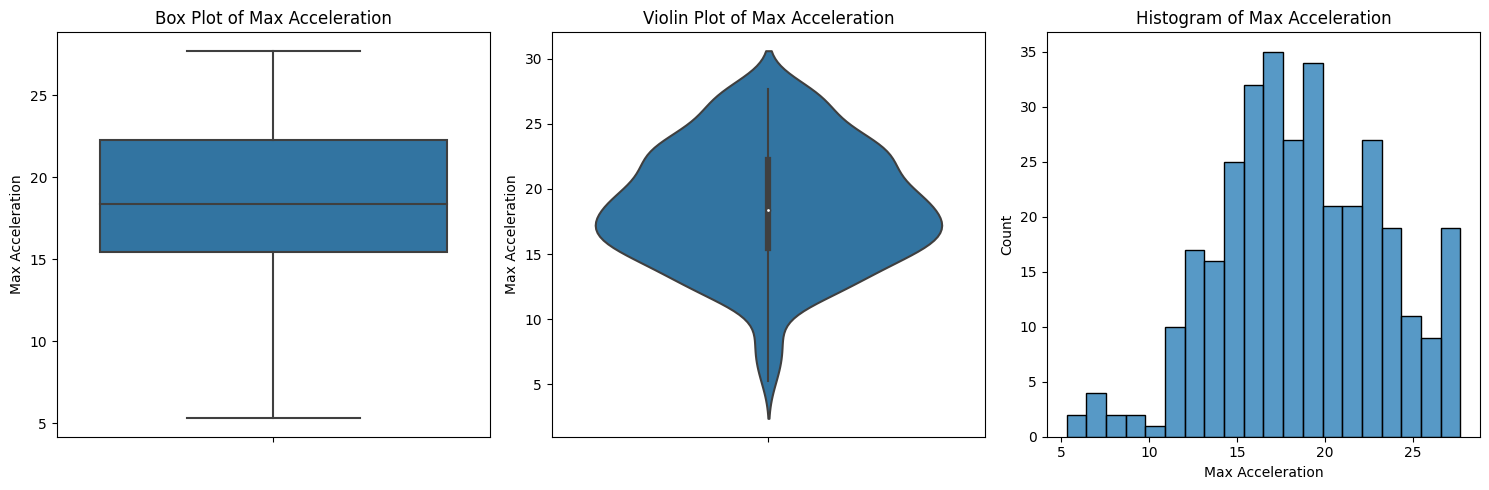

In [57]:
# Distribution of Max Acceleration feature
plotdist(df[['Max Acceleration']],'Max Acceleration')

Seems normal distribution

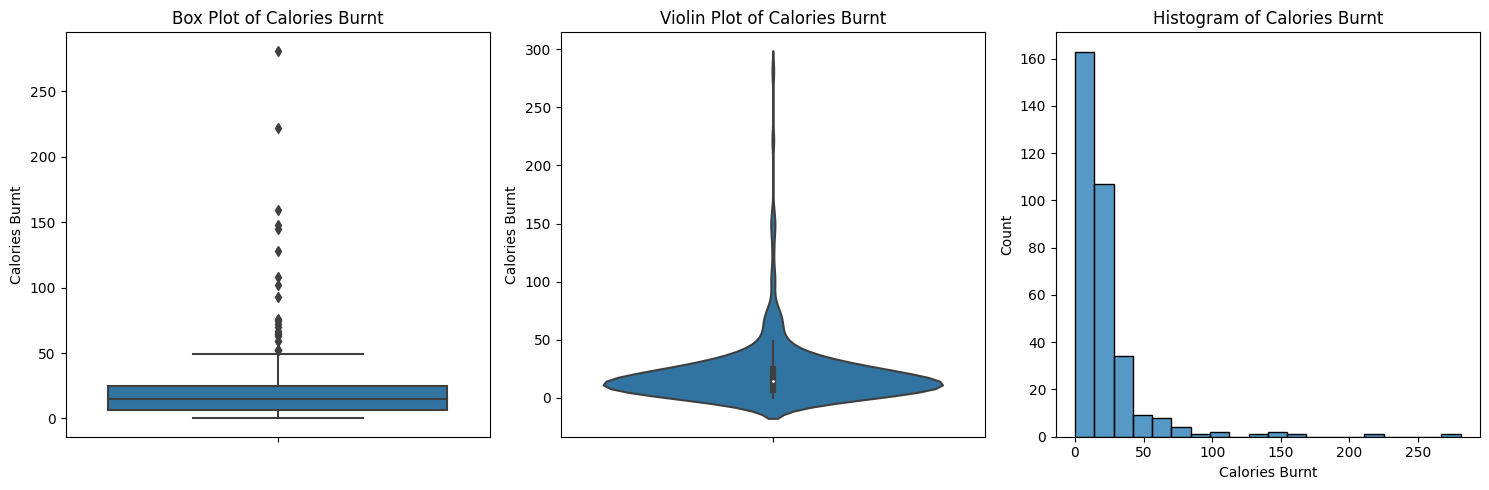

In [58]:
# Distribution of Calories Burnt feature
plotdist(df[['Calories Burnt']],'Calories Burnt')

Calories burnt metrics seems to have a lot of outliers, maybe because there are records where participant didnt play the game, and no calories burned was recorded.

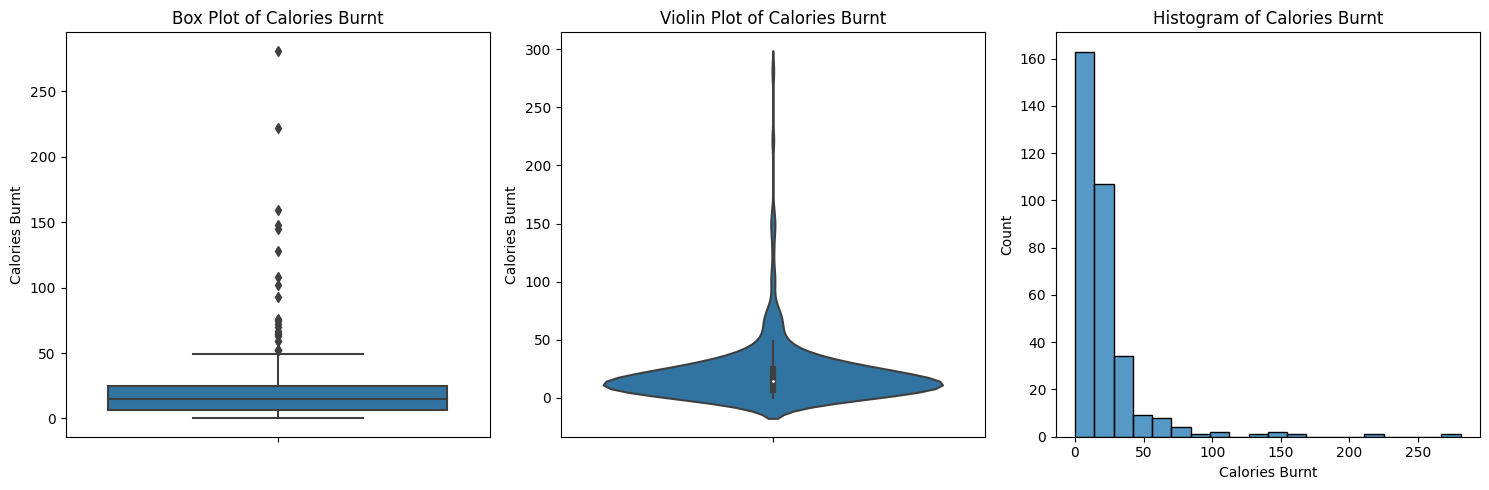

In [64]:
# Distribution of Calories burnt feature larger than 0
plotdist(df[df['Calories Burnt'] > 0],'Calories Burnt')

It means zero records do not affect the distribution

Assuming different games can burn different amounts of calories, let's check

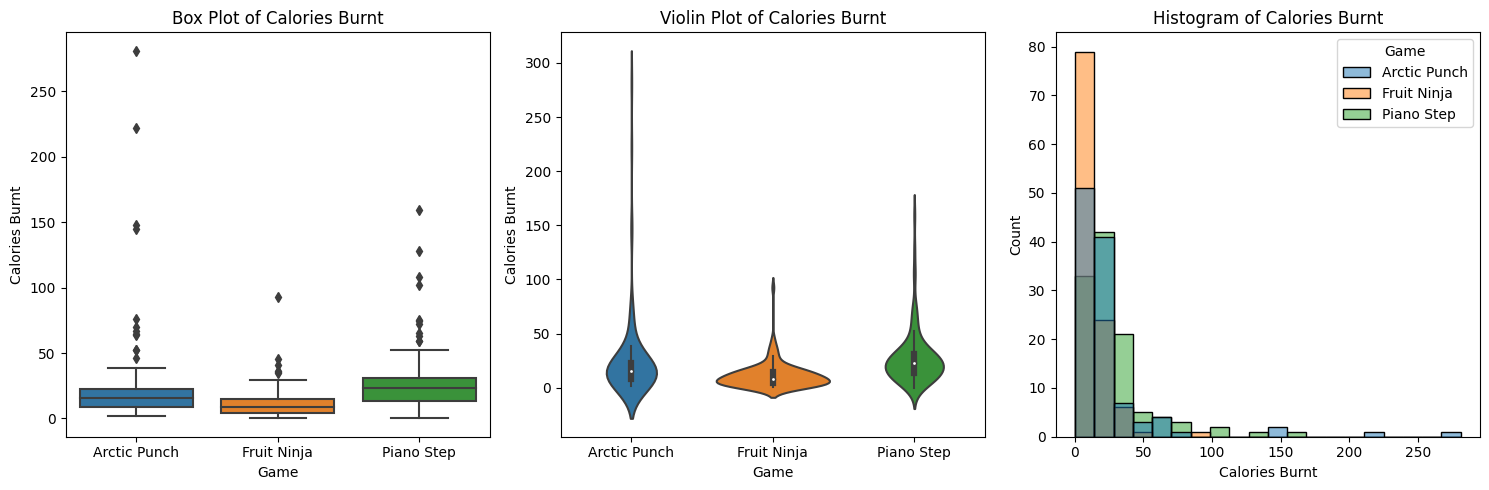

In [66]:
plotdist(df,'Calories Burnt', 'Game')

Fruit Ninja Game tends to have lesser outliers, Arctic Punch and Piano Step tend to have more outliers

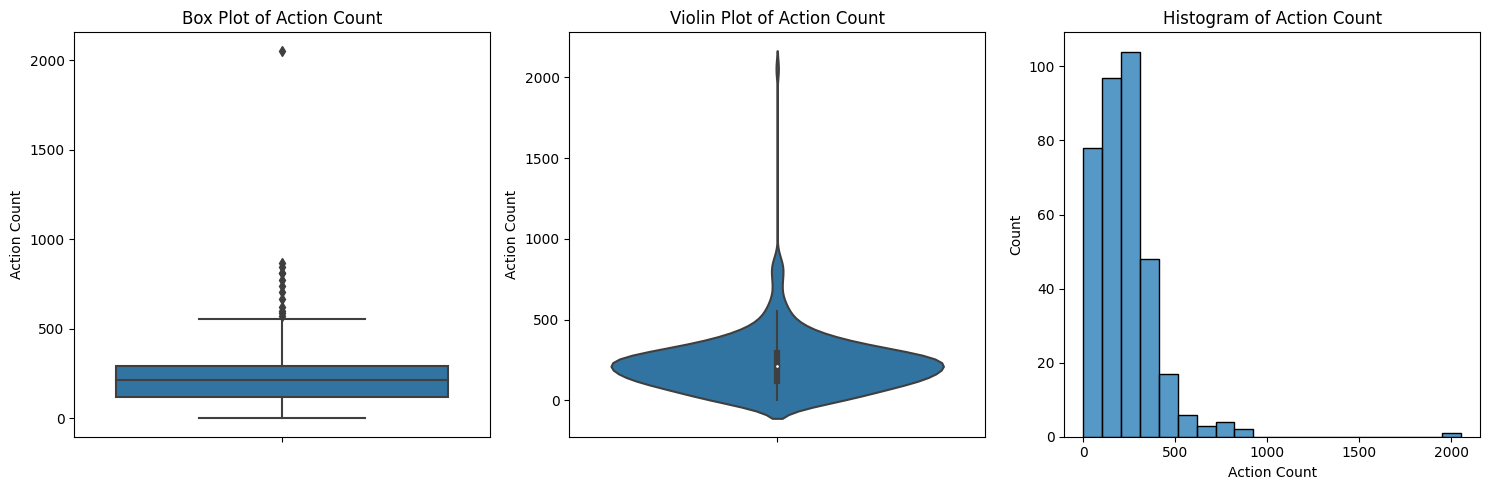

In [36]:
# Distribution of Action Count feature
plotdist(df[['Action Count']],'Action Count')

There are few things we can conclude from motion data:
1. Max Acceleration - approximately normal distribution, centered around 17, can be normalized while remaining its statistical properties
2. Calories burnt - heavily skewed towards left, mostly bundled around 5, many outliers, need to investigate the reason, can be scaled using log transformation
3. Action Count - skewed towards left, mostly bundled around 200, many outliers, need to investigate the reason, can be scaled using log transformation

#### Wellbeing data

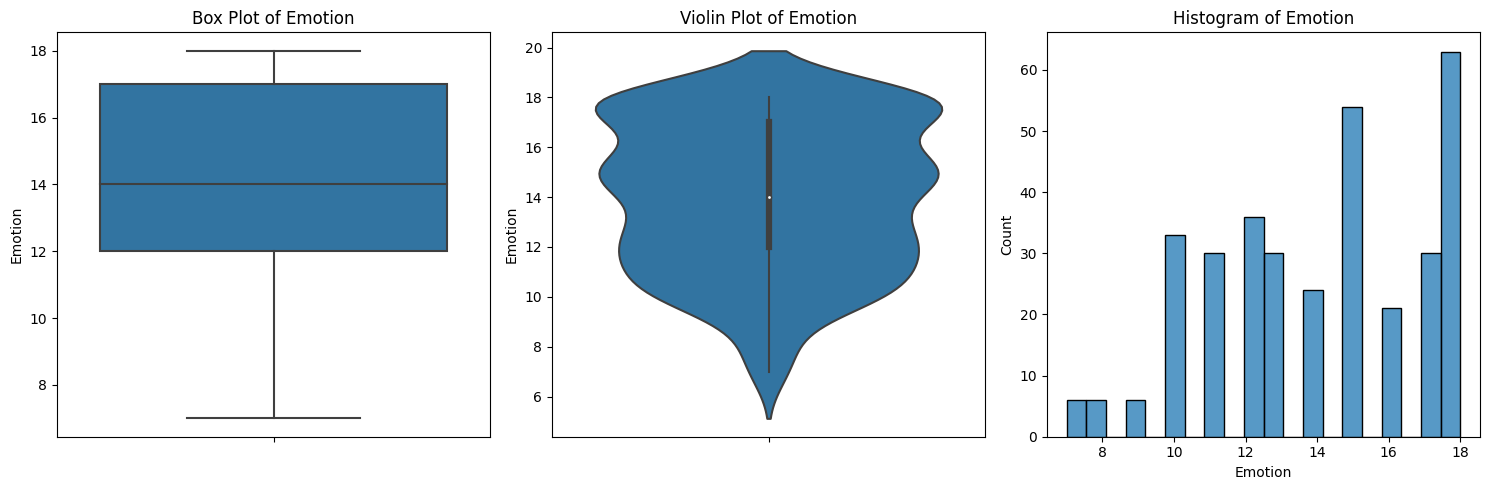

In [37]:
# Distribution of Emotion feature
plotdist(df[['Emotion']],'Emotion')

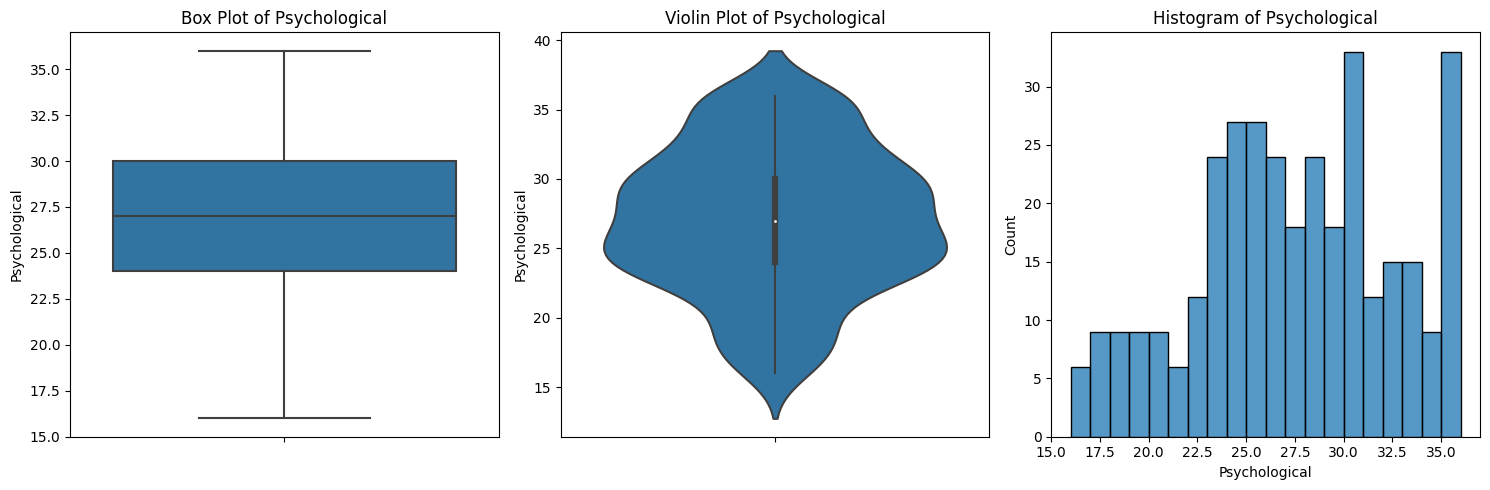

In [38]:
# Distribution of Psychological feature
plotdist(df[['Psychological']],'Psychological')

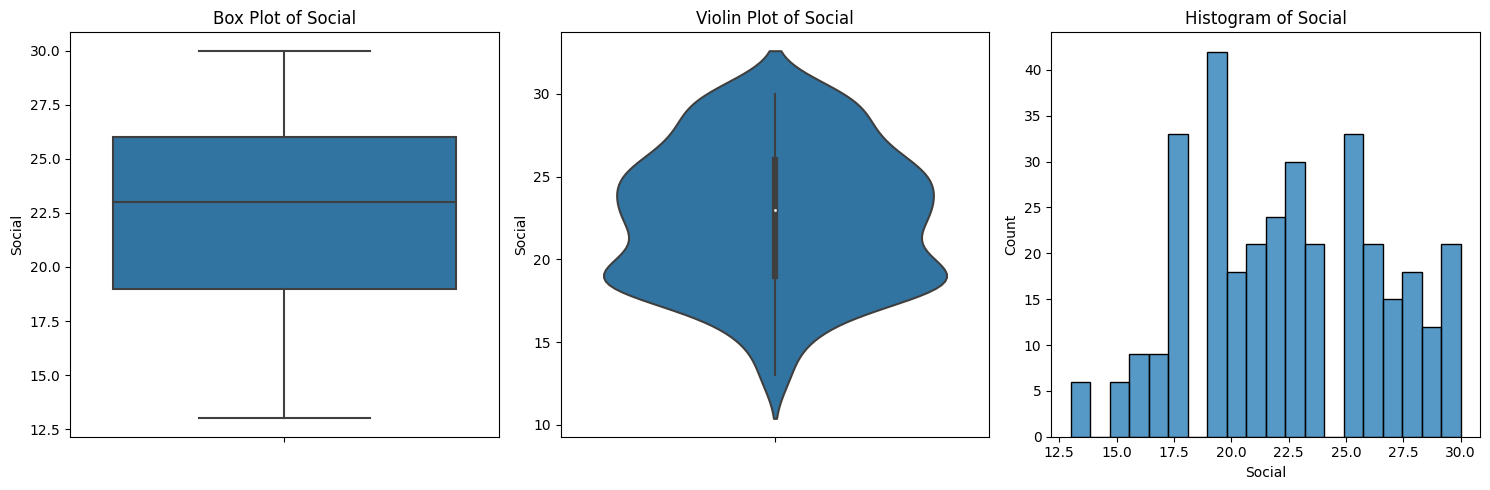

In [39]:
# Distribution of Social feature
plotdist(df[['Social']],'Social')

Statistical summary of all features

In [40]:
df.describe().apply(lambda x: x.round(2))

,Participant ID,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
count,360.00,334.00,360.00,360.00,339.00,339.00,339.00,339.00
mean,15.50,18.64,19.72,227.56,1.69,14.02,27.00,22.53
std,8.67,4.63,27.67,180.65,0.46,3.00,5.19,4.19
min,1.00,5.30,0.00,0.00,1.00,7.00,16.00,13.00
25%,8.00,15.46,5.36,118.50,1.00,12.00,24.00,19.00
50%,15.50,18.38,13.64,214.00,2.00,14.00,27.00,23.00
75%,23.00,22.25,23.67,294.25,2.00,17.00,30.00,26.00
max,30.00,27.71,281.12,2054.00,2.00,18.00,36.00,30.00


### Treating missing/invalid values

In [41]:
# Find rows with 0 or NA values
missing_rows = df[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))]

missing_rows

,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social
217,19,week2,Arctic Punch,NaN,0.0,0,2.0,13.0,22.0,22.0
218,19,week3,Arctic Punch,NaN,0.0,0,NaN,NaN,NaN,NaN
219,19,week4,Arctic Punch,NaN,0.0,0,NaN,NaN,NaN,NaN
221,19,week2,Fruit Ninja,NaN,0.0,0,2.0,13.0,22.0,22.0
222,19,week3,Fruit Ninja,NaN,0.0,0,NaN,NaN,NaN,NaN
223,19,week4,Fruit Ninja,NaN,0.0,0,NaN,NaN,NaN,NaN
225,19,week2,Piano Step,NaN,0.0,0,2.0,13.0,22.0,22.0
226,19,week3,Piano Step,NaN,0.0,0,NaN,NaN,NaN,NaN
227,19,week4,Piano Step,NaN,0.0,0,NaN,NaN,NaN,NaN
228,20,week1,Arctic Punch,NaN,0.0,0,2.0,18.0,24.0,23.0


It appears that only participant 19,20,24,27 having zero or missing motion/wellbeing data. Since the data do not provide insight, we remove them.

In [42]:
df = df.drop(df.index[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))])
missing_rows = df[(df.isna().any(axis=1)) | ((df[df.columns] == 0).any(axis=1))]
missing_rows

,Participant ID,Week,Game,Max Acceleration,Calories Burnt,Action Count,Companion condition,Emotion,Psychological,Social


### Treating outliers

As outliers will affect the overall model accuracy, we will have to dive in and see why there are outliers, and should we remove them.

In [43]:
df.dtypes

Participant ID           int64
Week                    object
Game                    object
Max Acceleration       float64
Calories Burnt         float64
Action Count             int64
Companion condition    float64
Emotion                float64
Psychological          float64
Social                 float64
dtype: object

First, we visualize those outliers in motion data: calories burned, max acceleration and action count

In [52]:
# Upper outlier for calories burnt feature
quantile = 0.90
calorie_burnt_upper = df[(df['Calories Burnt'] > np.quantile(df['Calories Burnt'], quantile))]
games_upper = calorie_burnt_upper['Game'].value_counts()
print('The value of 90th percentile of calories burned: {} kcal'.format(round(np.quantile(df['Calories Burnt'], quantile), 2)))
print('Count of Games with calories burned above the 90th percentile: \n{}'.format(games_upper))

The value of 90th percentile of calories burned: 38.69 kcal
Count of Games with calories burned above the 90th percentile: 
Game
Piano Step      18
Arctic Punch    13
Fruit Ninja      3
Name: count, dtype: int64


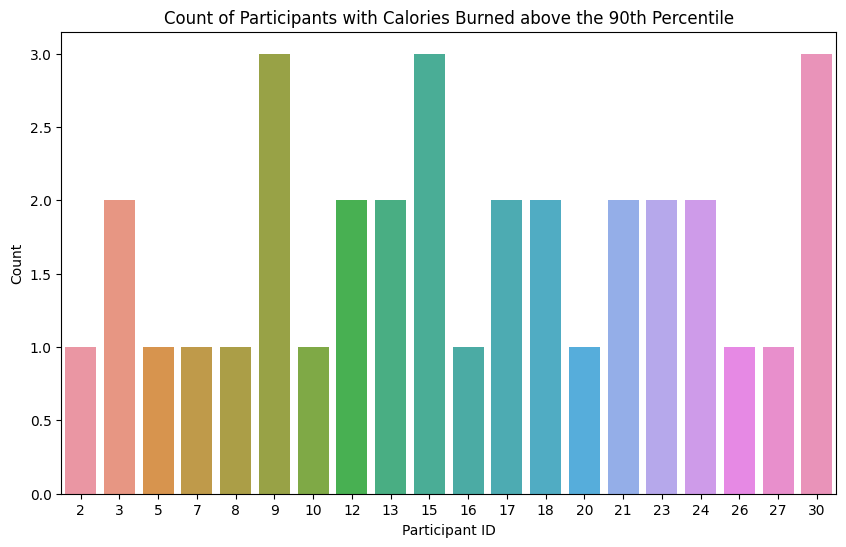

In [53]:
# Create a count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sb.countplot(data=calorie_burnt_upper, x='Participant ID')
plt.title('Count of Participants with Calories Burned above the 90th Percentile')
plt.xlabel('Participant ID')
plt.ylabel('Count')

# Show the plot
plt.show()

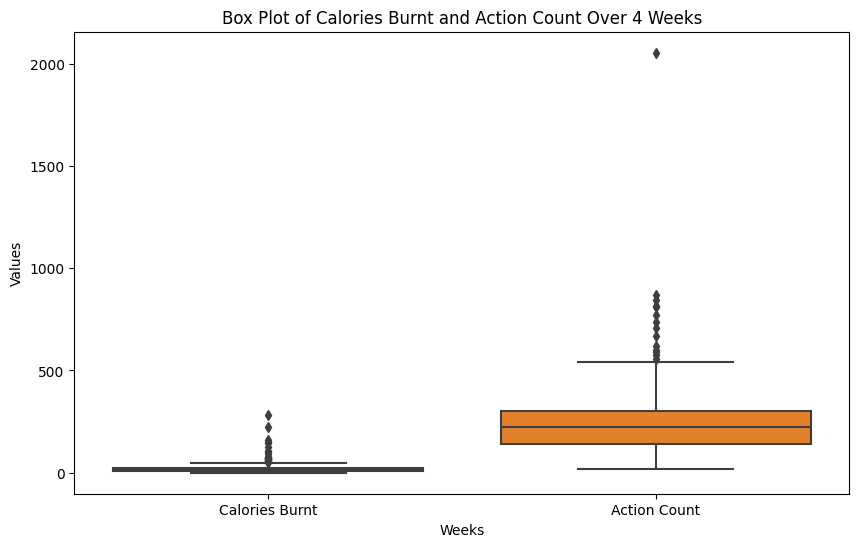

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sb.boxplot(data=df[['Calories Burnt', 'Action Count']])
plt.title('Box Plot of Calories Burnt and Action Count Over 4 Weeks')
plt.xlabel('Weeks')
plt.ylabel('Values')
plt.show()